In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


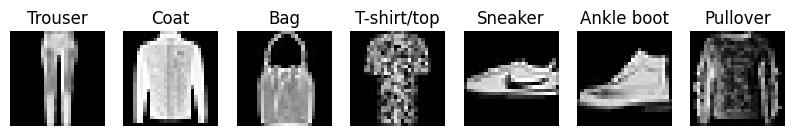

In [ ]:
# Define the class labels for fashion items
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display random images from the dataset
num_images_to_display = 7
random_indices = np.random.randint(0, len(train_images), num_images_to_display)

plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(class_labels[train_labels[idx]])
    plt.axis('off')

plt.show()

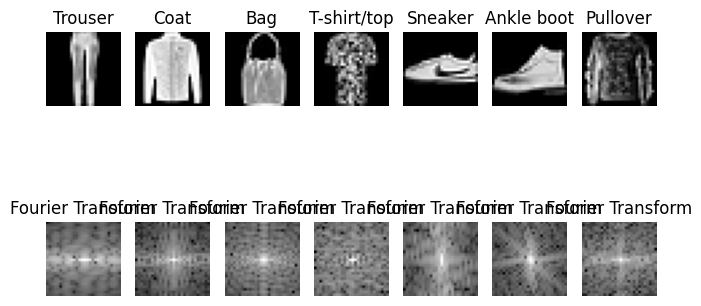

In [ ]:
for i, idx in enumerate(random_indices):
    # Original Image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(class_labels[train_labels[idx]])
    plt.axis('off')

    # Perform Fourier Transform
    f_transform = np.fft.fft2(train_images[idx])
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Log scaling for better visualization

    # Fourier Transform Image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Fourier Transform')
    plt.axis('off')

plt.tight_layout()
plt.show()

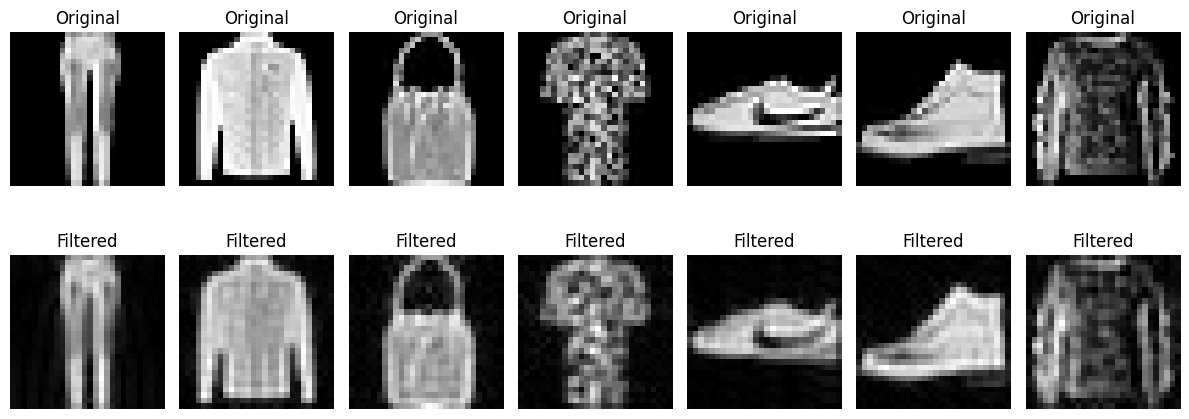

In [ ]:
# Define cutoff frequency for ideal low-pass filter
cutoff_frequency = 10

plt.figure(figsize=(12, 5))

for i, idx in enumerate(random_indices):
    # Original Image
    original_image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(original_image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = original_image.shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of frequencies
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))

    # Compute distance from the center for each frequency
    dist_from_center = np.sqrt(u**2 + v**2)

    # Create the ideal low-pass filter mask
    ideal_lp_mask = np.zeros((rows, cols), dtype=np.uint8)
    ideal_lp_mask[dist_from_center <= cutoff_frequency] = 1

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * ideal_lp_mask

    # Perform Inverse Fourier Transform to obtain the filtered image
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

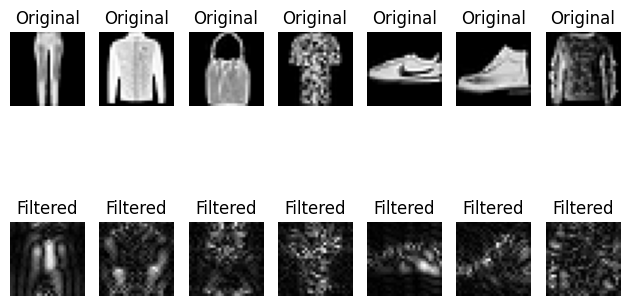

In [ ]:
#ideal high pass filter
# Define cutoff frequency for the ideal high-pass filter
cutoff_frequency = 10

for i, idx in enumerate(random_indices):
    # Load the image
    image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of frequencies
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))

    # Compute distance from the center for each frequency
    dist_from_center = np.sqrt(u**2 + v**2)

    # Create the ideal high-pass filter mask
    ideal_hp_mask = np.zeros((rows, cols), dtype=np.uint8)
    ideal_hp_mask[dist_from_center > cutoff_frequency] = 1

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * ideal_hp_mask

    # Take inverse Fourier Transform to obtain the filtered image in spatial domain
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

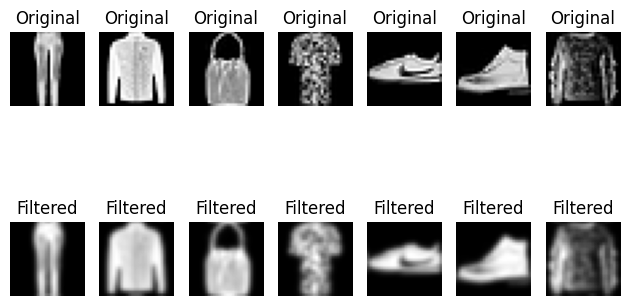

In [ ]:
#Gaussian low pass filter
# Define sigma for Gaussian filter
sigma = 5

for i, idx in enumerate(random_indices):
    # Load the image
    image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape

    # Create Gaussian filter mask
    center_row, center_col = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))
    gaussian_mask = np.exp(-(u**2 + v**2) / (2 * sigma**2))
    gaussian_mask /= np.sum(gaussian_mask)

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * gaussian_mask

    # Take inverse Fourier Transform to obtain the filtered image in spatial domain
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

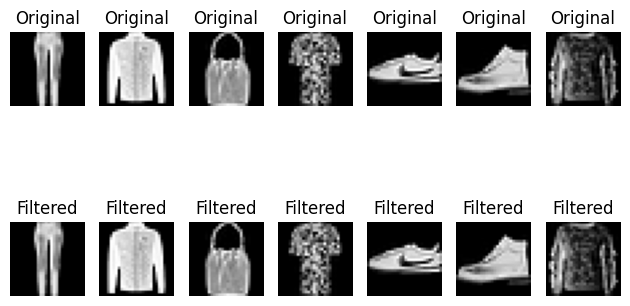

In [ ]:
##Gaussian high pass filter

# Define sigma for Gaussian filter
sigma = 5

for i, idx in enumerate(random_indices):
    # Load the image
    image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape

    # Create Gaussian filter mask
    center_row, center_col = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))
    gaussian_mask = np.exp(-(u**2 + v**2) / (2 * sigma**2))
    gaussian_mask /= np.sum(gaussian_mask)

    # Create high-pass filter mask by subtracting Gaussian filter mask from 1
    highpass_mask = 1 - gaussian_mask

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * highpass_mask

    # Take inverse Fourier Transform to obtain the filtered image in spatial domain
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()